## PROYECTO 13
---

### 1. Descripción del proyecto 
---
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

### 2. Objetivos 
---

- Predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
- Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
- Analizar los factores que más impactan la pérdida.
- Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:

    *identificar a los grupos objetivo;
    
   *sugerir medidas para reducir la rotación;
   
describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

### 3. Descarga y preparación de datos
---

In [2]:
# Importación de librerías 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Asignación de varible y visualización de una muestra del dataframe
gym_df= pd.read_csv('gym_churn_us.csv', encoding='unicode_escape')
gym_df.info()
gym_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
389,1,1,1,1,1,6,1,28,88.786944,5.0,8,3.897556,3.798186,0
614,1,0,1,0,1,1,1,30,185.344823,1.0,1,3.070076,2.971072,1
3835,1,1,1,0,1,12,1,34,177.331887,2.0,11,1.520359,1.453636,0
2031,1,0,1,0,1,6,0,29,37.145046,6.0,5,2.436315,2.469654,0
616,1,1,1,1,1,12,0,33,172.796781,10.0,6,2.186848,2.226154,0
1107,1,0,0,0,1,1,0,25,138.363141,1.0,2,0.548541,0.000000,1
3727,1,1,1,1,1,6,0,25,30.056283,6.0,4,1.350801,1.445443,0
2912,0,1,1,1,1,6,1,32,179.486901,6.0,9,2.172297,2.166573,0
3602,0,1,1,1,1,1,1,35,144.909739,1.0,11,4.091156,4.146970,0
1750,1,1,0,0,1,1,0,27,7.506704,1.0,1,0.992835,0.184394,1


In [4]:
# Estandarizar el nombre de todas la columnas y converción de tipo de datos de la columna 'Month_to_end_contract'
gym_df.rename(columns={'gender':'Gender'}, inplace=True)
gym_df['Month_to_end_contract']= gym_df['Month_to_end_contract'].astype('int')

### 4. Análisis exploratorio de datos (EDA)
---

In [5]:
# Busquéda de valores ausentes 
gym_df.isnull().sum()

Gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [6]:
# Estudio de los valores promedio y la desviación estándar 
gym_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [7]:
#Observación de los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron
median_values= gym_df.groupby('Churn').mean()
median_values

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


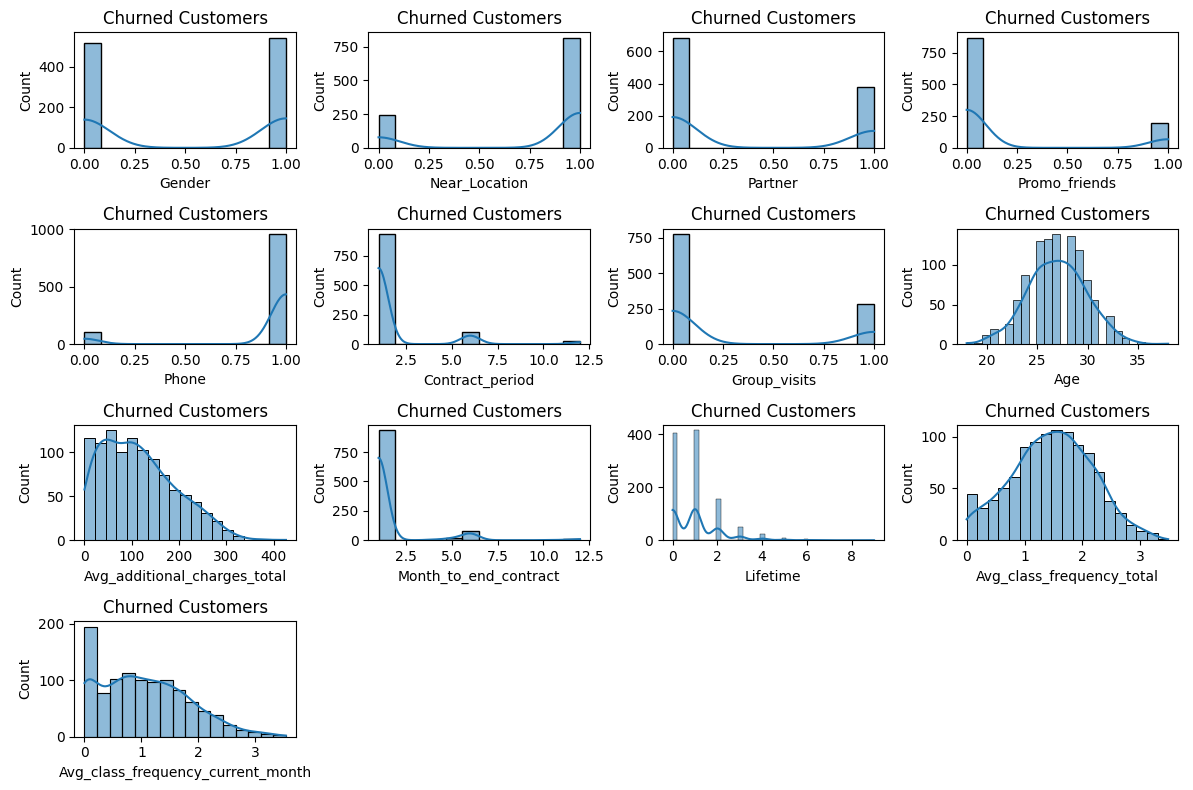

In [8]:
# Filtar DataFrame para encontrar el número de abandonos(1) y los que se quedan(0)
churned_customers= gym_df[gym_df['Churn'] == 1]
retained_customers= gym_df[gym_df['Churn'] == 0]

#Creación de histogramas de barras y distribuciones con cada característica 
features= ['Gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone' ,'Contract_period','Group_visits','Age','Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month' ]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(churned_customers[feature], kde = True)
    plt.title('Churned Customers')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

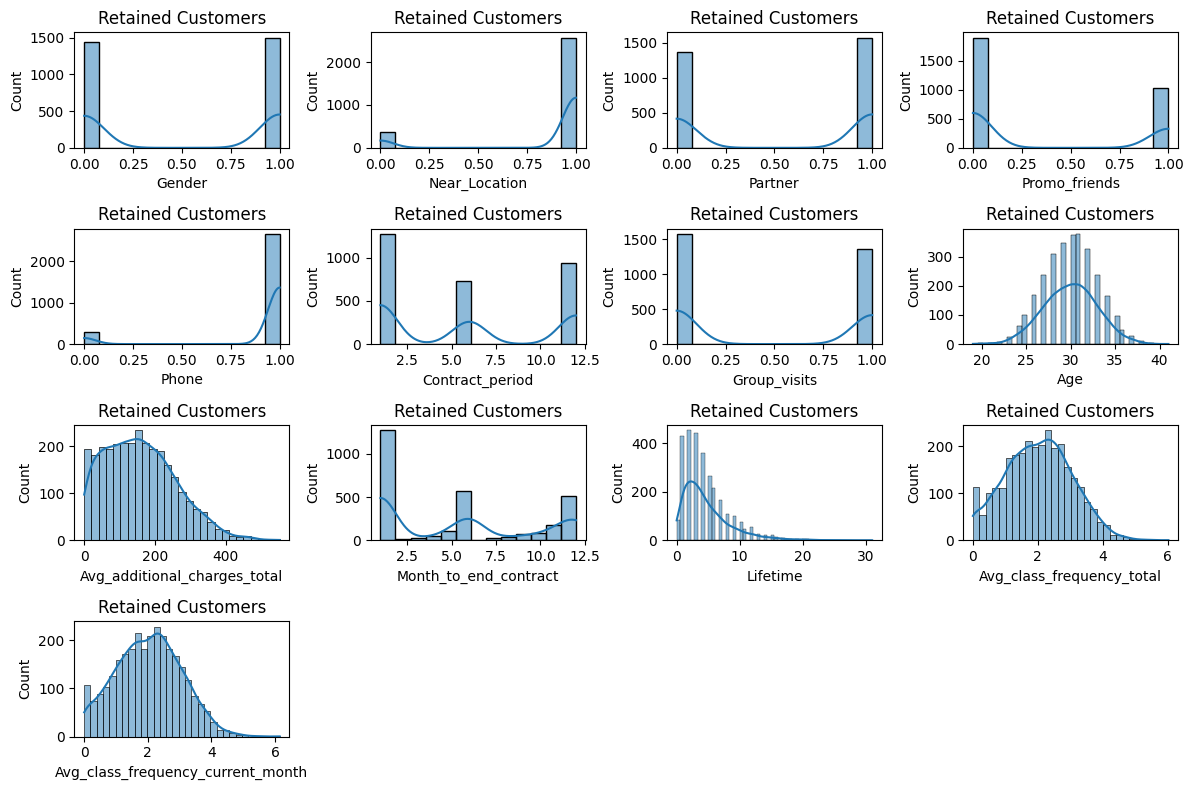

In [12]:
#Creación de histogramas de barras y distribuciones con cada característica 

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(retained_customers[feature], kde = True )
    plt.title('Retained Customers')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

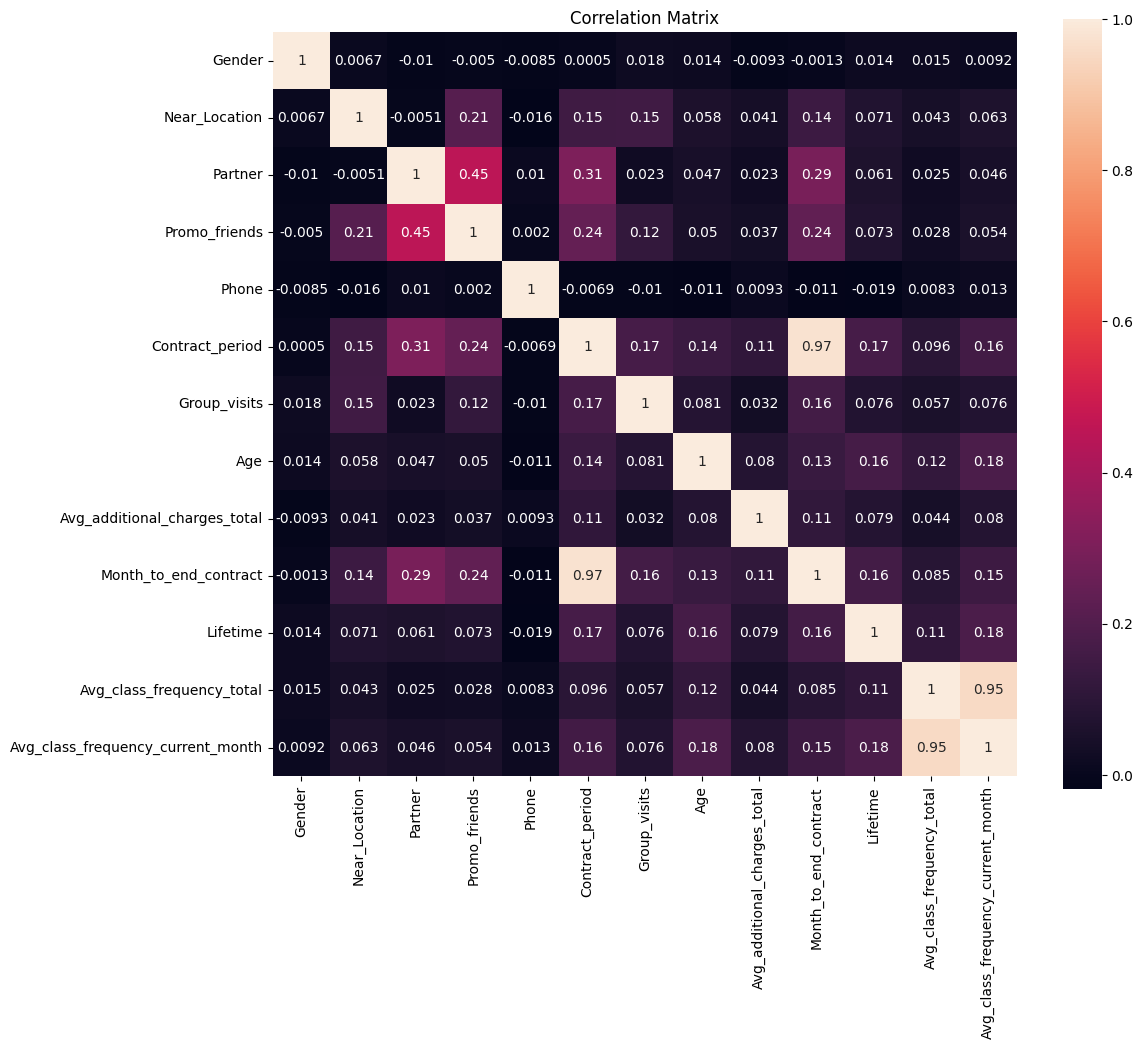

In [154]:
# Creación de matriz de correlación
data = gym_df[features]
matrix= data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(matrix, annot = True, square=True)
plt.title('Correlation Matrix')

Interpretación de las correlaciones en tu gráfico:

*Variables fuertemente correlacionadas:

-'Contract_period' y 'Month_to_end_contract' tienen una correlación muy fuerte y positiva. Esto es lógico, ya que cuanto más largo es el período del contrato, más meses quedan hasta que finalice.

-'Avg_class_frequency_total' y 'Avg_class_frequency_current_month' también tienen una correlación muy fuerte y positiva, lo que indica que aquellos usuarios que en promedio asisten a más clases en total, también tienden a asistir a más clases en el mes actual.

*Otras correlaciones interesantes:

-'Churn' (cancelación) tiene una correlación negativa con variables como 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total' y 'Lifetime'. Esto sugiere que los usuarios que cancelan su suscripción tienden a tener contratos más cortos, asisten a menos clases grupales, son más jóvenes, gastan menos en cargos adicionales y tienen una vida útil como clientes más corta.

-'Churn' tiene una correlación positiva con 'Promo_friends'. Esto podría indicar que los usuarios que se inscribieron a través de promociones de amigos tienen una mayor probabilidad de cancelar.

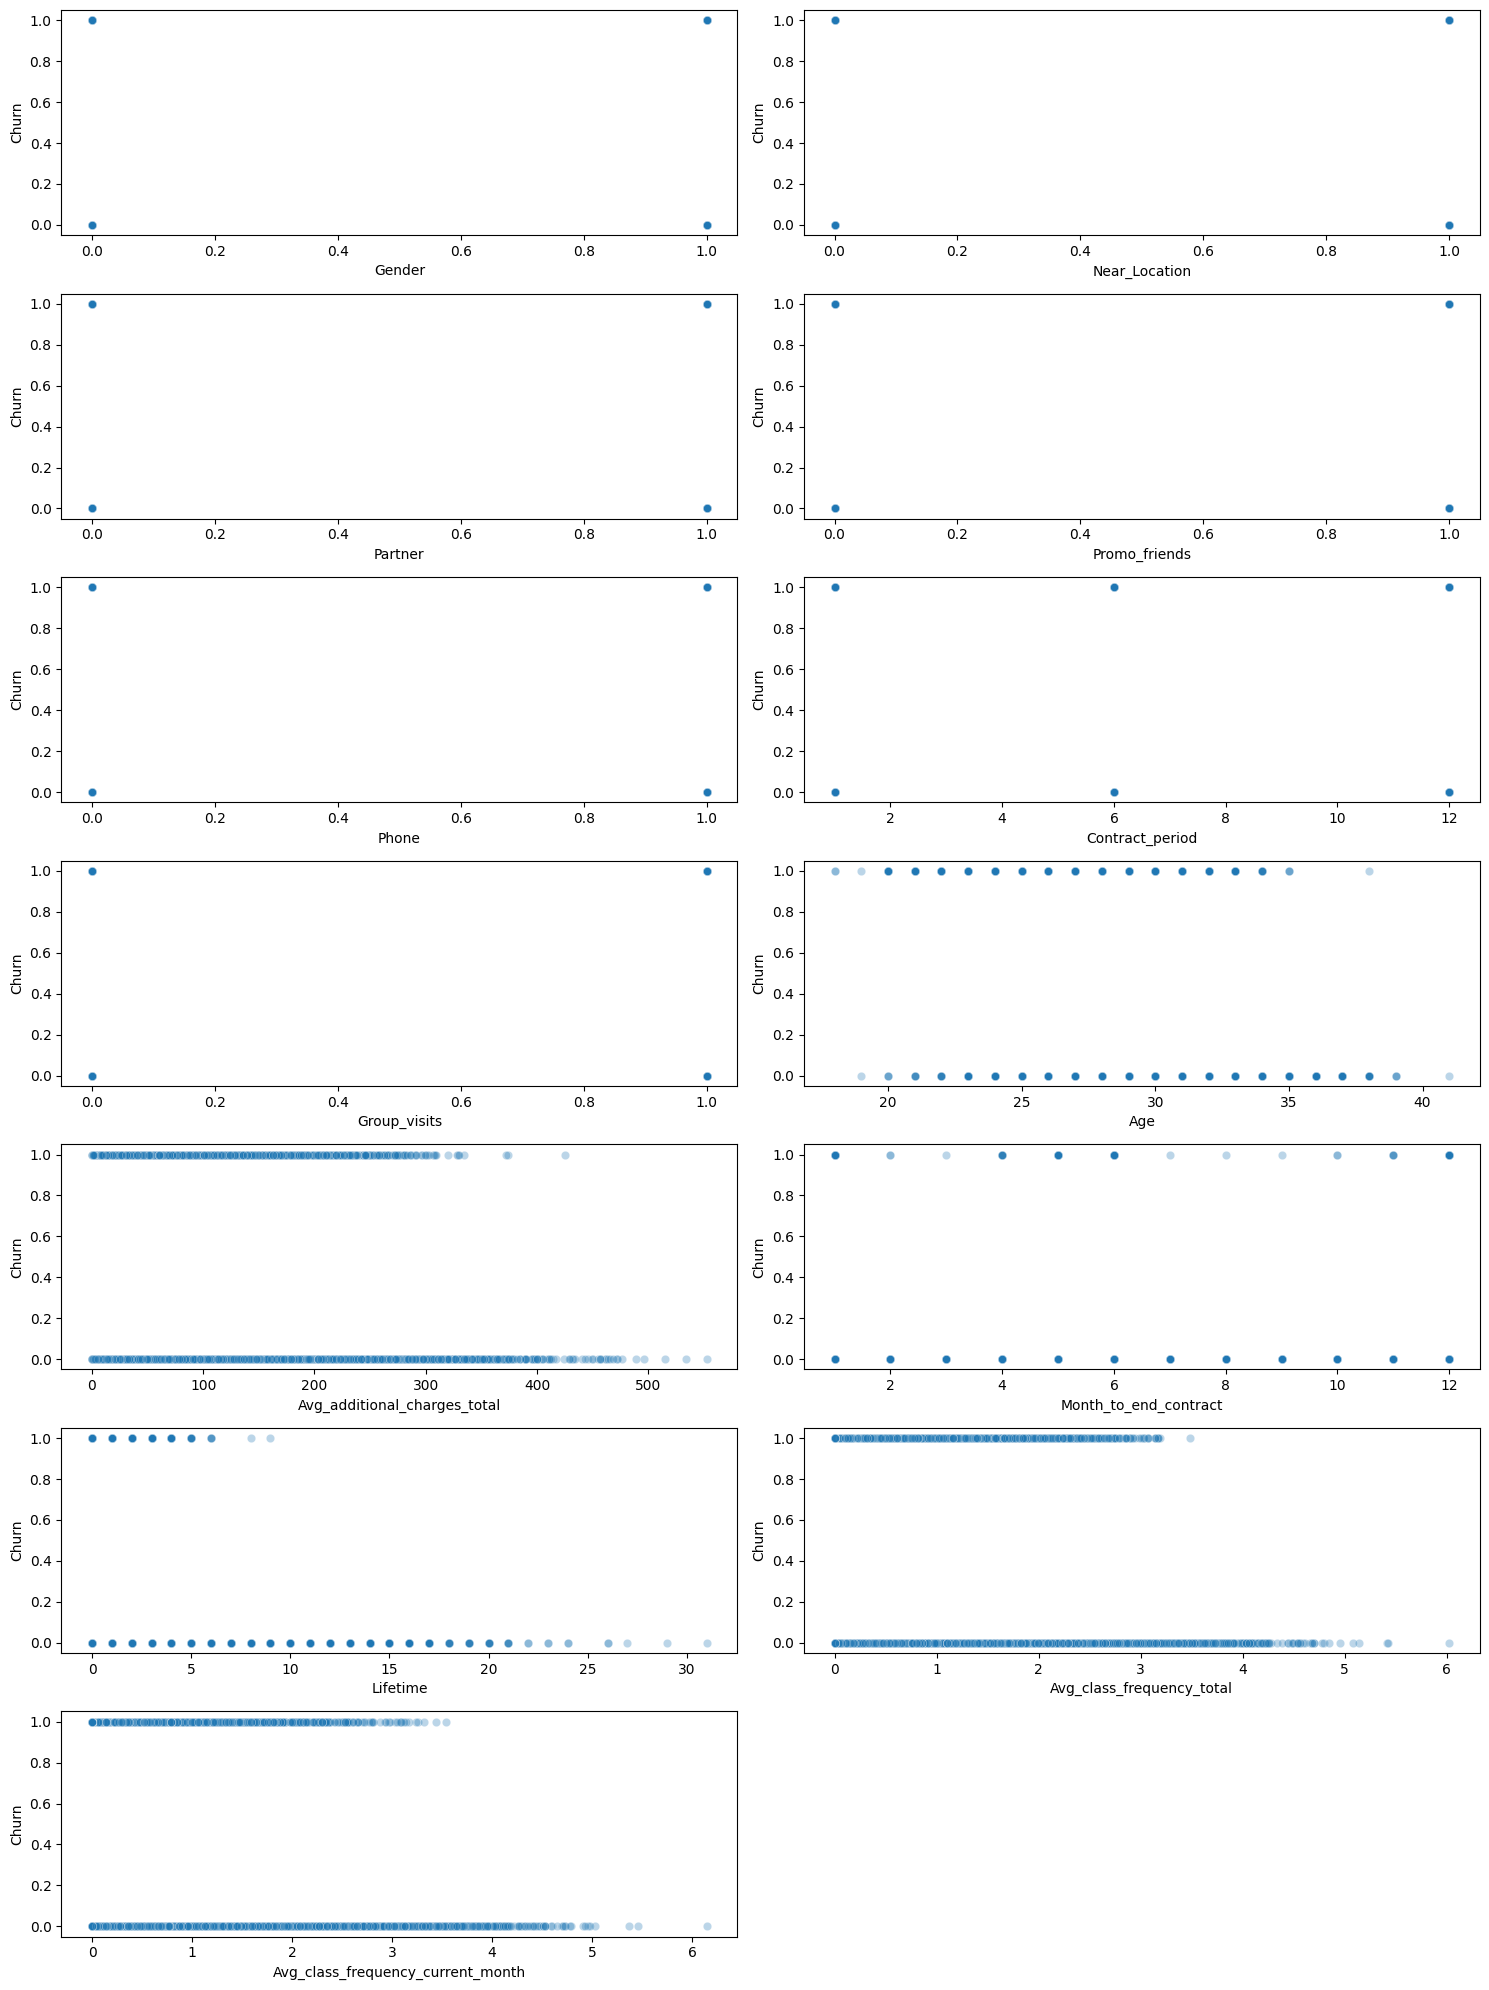

In [155]:
#Correlaciones por pares
plt.figure(figsize=(15, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(7, 2, i)
    sns.scatterplot(x=feature, y='Churn', data=gym_df, alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('Churn')
plt.tight_layout()
plt.show()

-En los primeros gráficos que muestra la relación de cancelaciones con las características de 'Genre', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_Period' y 'Group_Visits', se puede observar que no parece haber una correlación lineal fuerte; los puntos en los gráficos están bastante dispersos, lo que sugiere que no hay una relación lineal clara entre las variables independientes (característica9 y la variable dependiente (churn). Posible relación no lineal entre algunas variables y el churn. Por ejemplo, podría haber un punto de inflexión a partir del cual la probabilidad de churn aumenta significativamente.

-Avg_additional_charges_total vs. Churn: hay una ligera tendencia a que la probabilidad de churn disminuya a medida que aumentan los cargos adicionales. Esto podría indicar que los usuarios que gastan más dinero están más comprometidos con el servicio.

-Age vs. Churn: No se observa una relación clara entre la edad y la probabilidad de churn.

-Month_to_end_contract vs. Churn: Tampoco se aprecia una relación evidente entre el tiempo restante de contrato y el churn.

-Lifetime vs. Churn: Al igual que en los casos anteriores, no hay una correlación clara entre la antigüedad del cliente y la probabilidad de churn.

-Avg_class_frequency_total vs. Churn: No se observa una relación clara entre la frecuencia total de clases y el churn.

-Avg_class_frequency_current_month vs. Churn: Tampoco hay una relación evidente entre la frecuencia de clases en el mes actual y el churn.

Basados en estos gráficos, podemos concluir que:

No existe una relación lineal clara entre las variables analizadas y la probabilidad de churn.

Es posible que existan relaciones no lineales o interacciones entre variables que no se están capturando en estos gráficos.

Se requiere un análisis más profundo para identificar los factores que realmente influyen en la probabilidad de churn.


### 5. Modelo para predecir la cancelación de usuarios
---

In [156]:
# División de características de variable destino 
X= gym_df.drop(columns= ['Churn'])
y= gym_df['Churn']

# División de los datos en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Datos en entrenamiento y test
print("Número de datos en entrenamiento :", len(X_train))
print("Número de datos en test: ", len(X_test))

Número de datos en entrenamiento : 3200
Número de datos en test:  800


#### -Regresión logística

In [157]:
#Creación de un objeto StandardScaler y aplicación al conjunto de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Estandarización a la matriz
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])

# Definición del modelo de 'Regresión Logistica'
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)

predictions = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print()
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

[[-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  1.60502986
  -0.84769226  0.57944798  0.37161711  1.59173796  1.12734972  1.75580418
   1.61822807]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125  0.31628211 -0.81299073
  -0.84769226  0.27046055 -1.09697378 -0.79568246  5.88138322 -0.2239674
  -0.01340886]
 [ 0.98511083  0.4175068   1.03175391 -0.67567125  0.31628211  1.60502986
  -0.84769226 -0.65650171 -1.18374157  1.83048     0.3350108  -0.84308456
  -0.80541199]
 [-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  0.28610954
  -0.84769226 -0.96548914 -0.95158829  0.39802775  1.39146269  0.66771379
   0.64605224]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125 -3.16173427 -0.81299073
  -0.84769226 -0.03852687  0.97190435 -0.79568246  0.07089783 -0.19587934
  -0.16038147]]

Accuracy: 0.91125
Precision: 0.8256410256410256
Recall: 0.8131313131313131


c:\Users\Cecilia Moyaho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [158]:
# Regresión logística con datos de validación
predictions = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.91125
Precision: 0.8256410256410256
Recall: 0.8131313131313131


In [159]:
# Regresión logística con datos de entrenamiento
predictions = logistic_model.predict(X_train)

accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions)
recall = recall_score(y_train, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9275
Precision: 0.8968553459119497
Recall: 0.8261877172653534


#### -Bosque Aleatorio

In [160]:
# # Definición del modelo de 'Bosque Aleatorio'
random_forest = RandomForestClassifier(random_state = 0)

# Entrenamiento del modelo
random_forest.fit(X_train, y_train)

# Predicciones del conjunto de datos de validación 
predictions = random_forest.predict(X_test)

# Evaluación 
accuracy= accuracy_score(y_test, predictions)
precision= precision_score(y_test, predictions)
recall= recall_score(y_test, predictions)


print("Random Forest datos de Validación:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Random Forest datos de Validación:
Accuracy: 0.91625
Precision: 0.8393782383419689
Recall: 0.8181818181818182


In [161]:
# Predicciones del conjunto de datos de entrenamiento
predictions = random_forest.predict(X_train)

# Evaluación 
accuracy= accuracy_score(y_train, predictions)
precision= precision_score(y_train, predictions)
recall= recall_score(y_train, predictions)


print("Random Forest datos de entrenamiento:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Random Forest datos de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


#### -Evaluación de la exactitud, precisión y recall para ambos modelos utilizando los datos de validación.

In [163]:
# Predicciones sobre los datos de validación 
pred_val_rf = random_forest.predict(X_test)
pred_val_logistic = logistic_model.predict(X_test)

# Evaluación de desempeño modelo de 'Regresion Logística'
accuracy_logistic_val = accuracy_score(y_test, pred_val_logistic)
precision_logistic_val = precision_score(y_test, pred_val_logistic)
recall_logistic_val = recall_score(y_test, pred_val_logistic)

# Evaluación de desempeño modelo 'Random Forest'
accuracy_rf_val = accuracy_score(y_test, pred_val_rf)
precision_rf_val = precision_score(y_test, pred_val_rf)
recall_rf_val = recall_score(y_test, pred_val_rf)

# Predicciones sobre los datos de entrenamiento
pred_train_rf = random_forest.predict(X_train)
pred_train_logistic = logistic_model.predict(X_train)

# Evaluación de desempeño modelo de 'Regresion Logística'
accuracy_logistic_train = accuracy_score(y_train, pred_train_logistic)
precision_logistic_train = precision_score(y_train, pred_train_logistic)
recall_logistic_train = recall_score(y_train, pred_train_logistic)

# Evaluación de desempeño modelo 'Random Forest'
accuracy_rf_train = accuracy_score(y_train, pred_train_rf)
precision_rf_train = precision_score(y_train, pred_train_rf)
recall_rf_train = recall_score(y_train, pred_train_rf)


print("Evaluación sobre los datos de validación :")
print("======================================")
print("Regresión Logística :")
print("Accuracy :", accuracy_logistic_val)
print("Precision :", precision_logistic_val)
print("Recall :", recall_logistic_val)
print("--------------------------------------")
print("Bosque Aleatorio :")
print("Accuracy :", accuracy_rf_val)
print("Precision :", precision_rf_val)
print("Recall :", recall_rf_val)

print("\nEvaluación sobre los datos de entrenamiento:")
print("======================================")
print("Regresión Logística :")
print("Accuracy :", accuracy_logistic_train)
print("Precision :", precision_logistic_train)
print("Recall :", recall_logistic_train)
print("--------------------------------------")
print("Bosque Aleatorio :")
print("Accuracy :", accuracy_rf_train)
print("Precision :", precision_rf_train)
print("Recall :", recall_rf_train)

Evaluación sobre los datos de validación :
Regresión Logística :
Accuracy : 0.91125
Precision : 0.8256410256410256
Recall : 0.8131313131313131
--------------------------------------
Bosque Aleatorio :
Accuracy : 0.91625
Precision : 0.8393782383419689
Recall : 0.8181818181818182

Evaluación sobre los datos de entrenamiento:
Regresión Logística :
Accuracy : 0.9275
Precision : 0.8968553459119497
Recall : 0.8261877172653534
--------------------------------------
Bosque Aleatorio :
Accuracy : 1.0
Precision : 1.0
Recall : 1.0


### 6. Creación de clústeres de usuarios
---

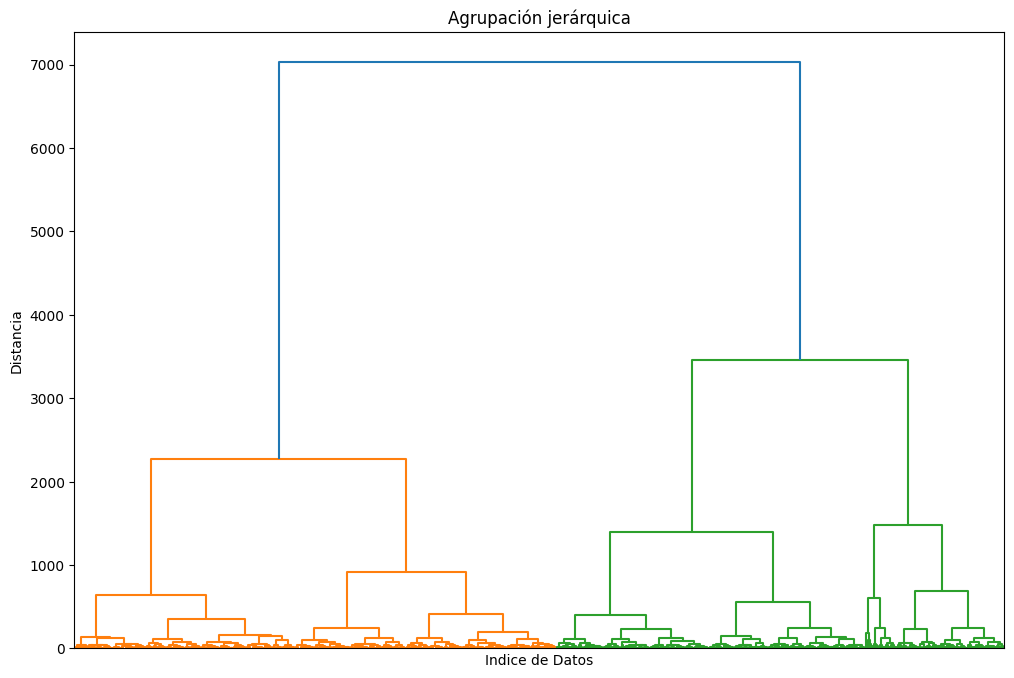

In [14]:
#Deficinición de variable de las características 
features = gym_df.drop('Churn', axis = 1)

#Estandarización
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

linked = linkage(features, method = 'ward')

#Creación de dendograma 
plt.figure(figsize=(12, 8))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica')
plt.xlabel('Indice de Datos')
plt.ylabel('Distancia')
plt.xticks([])
plt.show()

In [187]:
# Agrupación en 5 clusters 
n_clusters = 5
kmeans = KMeans(n_clusters, random_state=0)
gym_df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualizar resultados 
gym_df[['Churn', 'Cluster']].head(5)

,Churn,Cluster
0,0,3
1,0,1
2,0,3
3,0,4
4,0,3


In [188]:
# Búsqueda del valor promedio de las característica para cada grupo
cluster_means = gym_df.groupby('Cluster').mean()

# Visualización de resultados
cluster_means

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.482160,0.799421,0.000000,0.088717,1.000000,1.768563,0.320154,28.133076,130.886147,1.702989,2.231437,1.325339,1.079292,0.563163
1,0.511811,0.883858,0.551181,0.000000,0.870079,11.598425,0.523622,29.952756,162.413804,10.665354,4.698819,1.936725,1.926517,0.029528
2,0.542886,0.892028,0.362260,0.237134,0.941473,2.848638,0.445005,30.195762,162.427066,2.608476,5.070636,2.865284,2.869596,0.052472
3,0.510638,0.732363,0.872340,0.376260,0.765957,2.248600,0.287794,28.388578,128.291166,2.115342,2.670773,1.336016,1.122474,0.446809
4,0.502627,0.989492,0.926445,1.000000,0.907180,10.802102,0.618214,29.898424,164.641909,9.865149,4.882662,1.970731,1.968777,0.019264


Observaciones:

-Característica 'Partner': el clúster 4 tiene un valor promedio alto (.92), mientras que el grupo 0 tiene el valor promedio más bajo (0). Es más probable que los clientes del grupo 4 sean empleados de empresas asociadas a centros de fitness.

-Característica 'Contract_period': el clúster 1 tiene el valor promedio más alto de la característica (11.59), lo que indica que los usuarios tienden a tener contratos a largo plazo.

-Característica 'Lifetime': los clústers 2 y 4 tienen los valores medios más altos de la característica (5.07 y 4.88), lo que indica que los usuarios han sido miembros del gimnasio durante un período más largo.

-Característica 'Avg_additional_charges_total': el grupo 4 tiene un valor medio más alto (164.64), lo que indica que los usuarios tienden a gastar más dinero en servicios adicionales. 

-Característica 'Near_Location': el clúster 4 tiene un valor medio cercano a 1 (.98), lo que significa que la mayoría de los usuarios viven cerca de el gimnasio. En el clúster 3, el valor medio es el más bajo (.73), lo que indica que la mayoría de los clientes en este grupo no viven cerca de el gimnasio.

-Característica 'Group_visits': el clúster 4 tiene un valor medio más alto (.61), lo que indica que los usuarios tienden a asistir a sesiones grupales en el gimnasio con más frecuencia.

-Característica 'Avg_class_frequency_total': el clúster 2 tiene un valor promedio más alto (2.86) en comparación con otros clúster, lo que indica que los clientes en este grupo tienden a ser más activos.

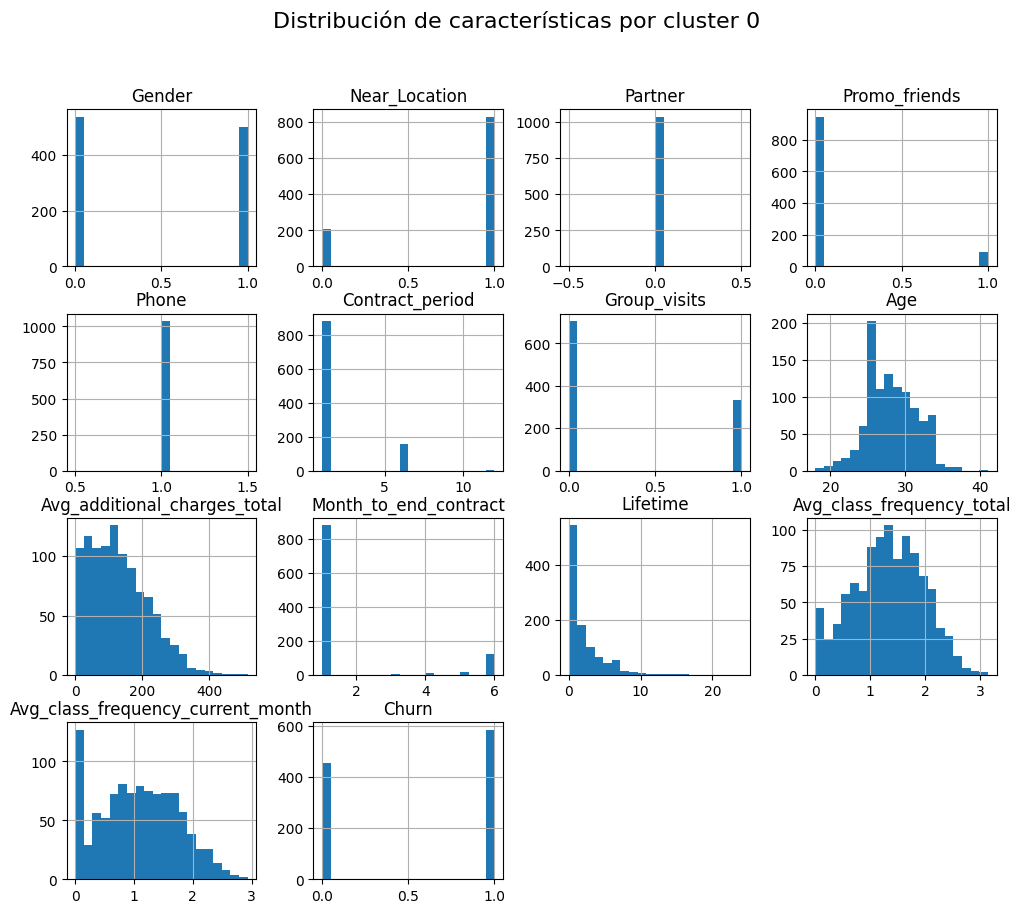

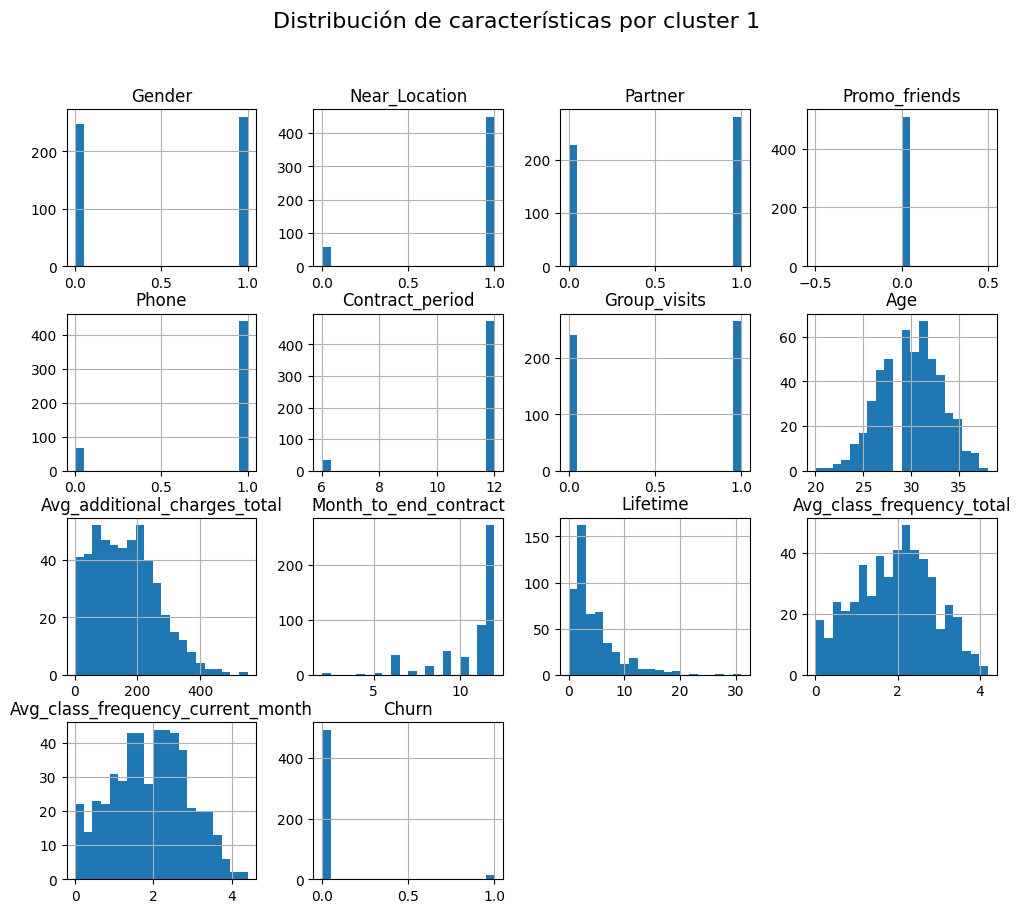

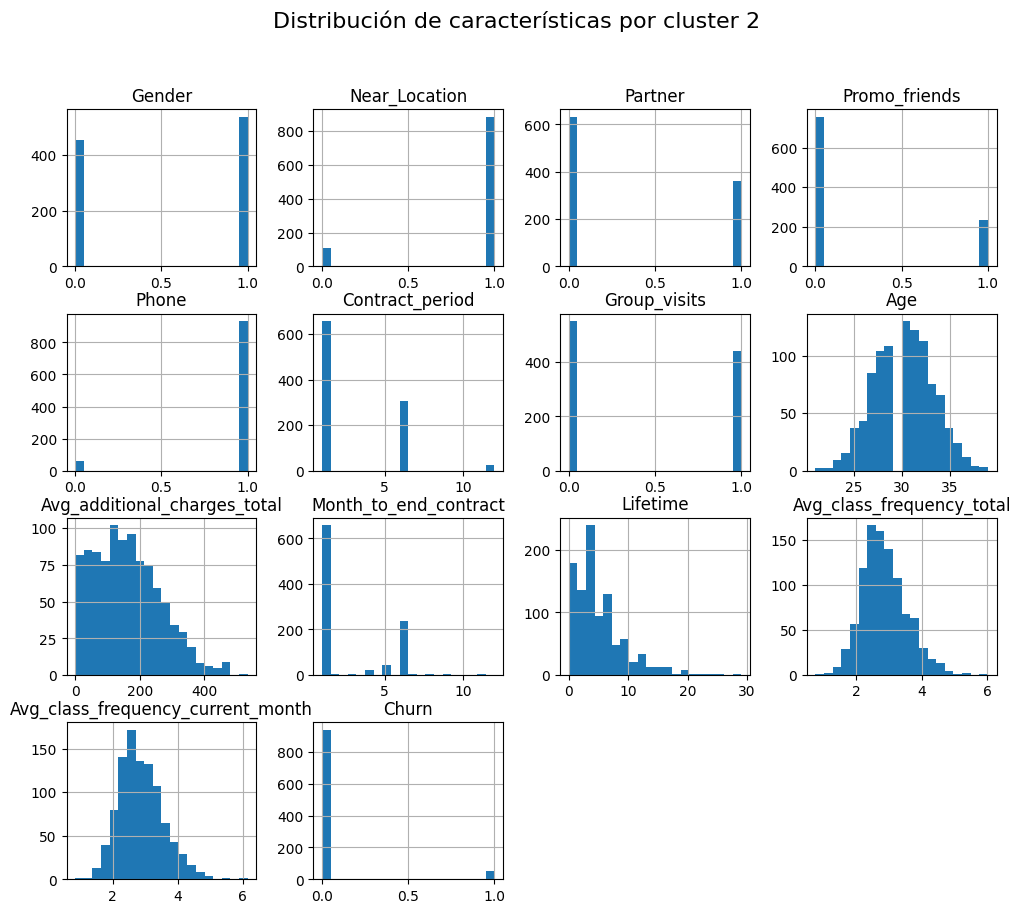

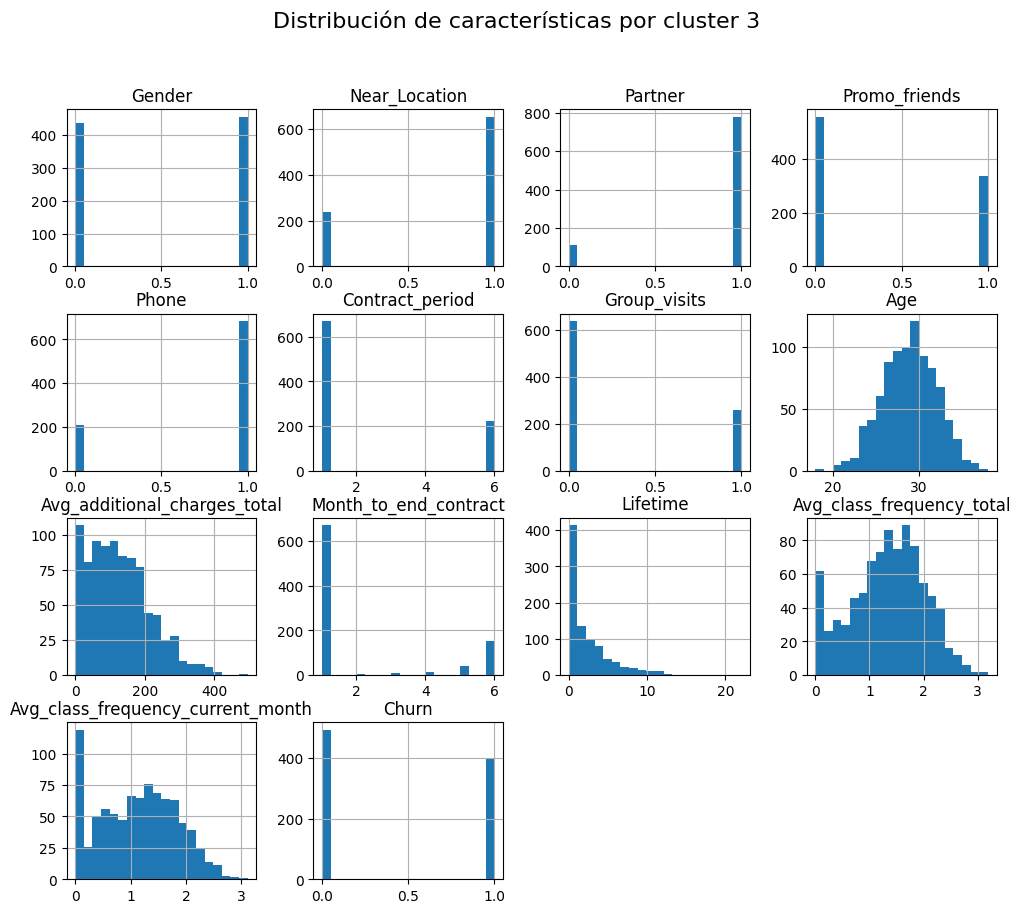

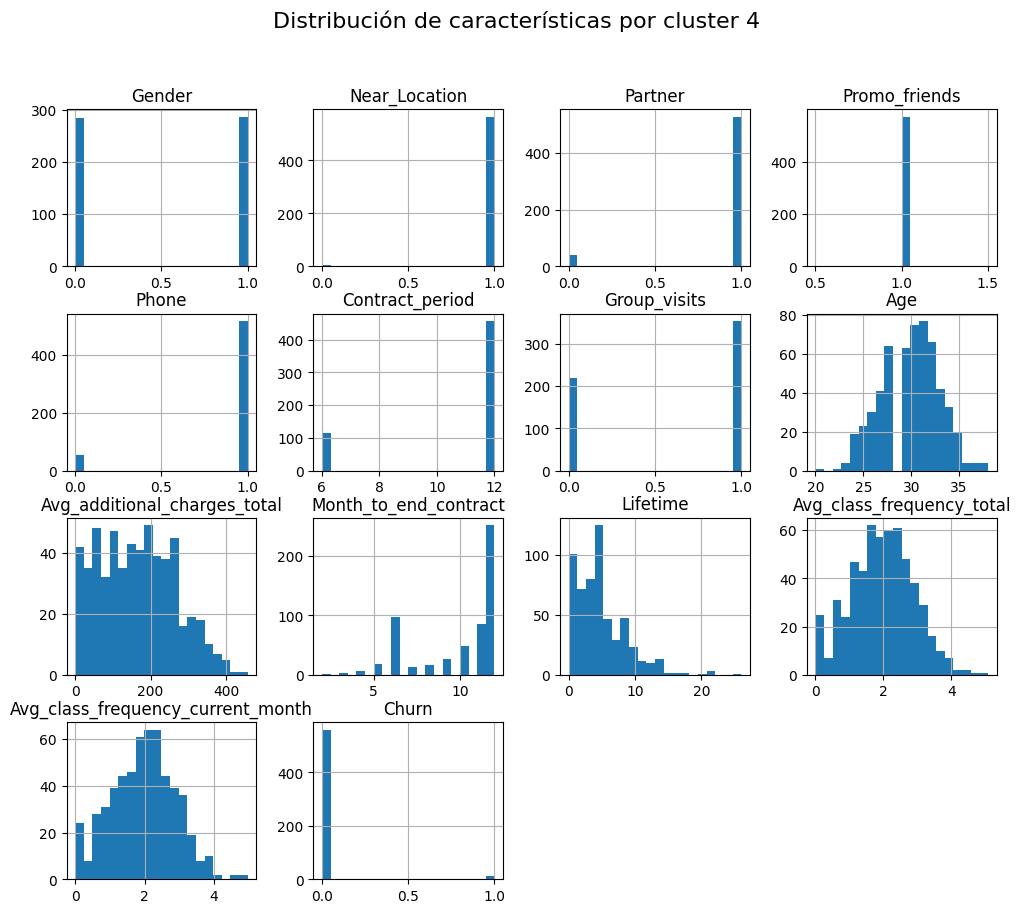

In [190]:

# Distribución de características por cluster
for i in range(n_clusters):
    cluster_data = gym_df[gym_df['Cluster'] == i].copy()
    cluster_data.drop('Cluster', axis=1, inplace=True)
    cluster_data.hist(figsize=(12, 10), bins = 20)
    plt.suptitle(f'Distribución de características por cluster {i}', fontsize =16)
    plt.show()

In [191]:
#Calculo de la tasa de cancelación para cada clúster
churn_rate = gym_df.groupby('Cluster')['Churn'].mean()

#Visualizar resultados
churn_rate

Cluster
0    0.563163
1    0.029528
2    0.052472
3    0.446809
4    0.019264
Name: Churn, dtype: float64

-Clúster 0: Es el clúster con la tasa de cancelación más alta (0.563163), lo que sugiere que casi la mitad de los clientes en este grupo han cancelado. Este es un segmento crítico que requiere una atención especial para entender las razones detrás de estas cancelaciones y tomar medidas correctivas.

-Clúster 3: Le sigue en tasa de cancelación con un 0.446809, lo que también indica un problema significativo.

-Clúster 1, 2 y 4: Tienen tasas de cancelación mucho más bajas, lo que sugiere que estos clientes son más leales y menos propensos a cancelar.

### 7. Conclusiones y recomendaciones
---

1.Análisis en profundidad:

-Perfilar los clústers: Identificar las características demográficas, comportamentales y psicográficas de los clientes en cada clúster.

-Analizar el historial de interacciones: Revisar el historial de compras, las comunicaciones con el servicio al cliente y otras interacciones para identificar patrones y tendencias.

-Comparar con otros datos: Relacionar los resultados con otros datos disponibles, como métricas de satisfacción del cliente, resultados de encuestas, etc.

2.Desarrollar estrategias de retención:

-Personalizar las ofertas: Diseñar ofertas y promociones específicas para cada clúster, basadas en sus necesidades y preferencias.

-Mejorar la experiencia del cliente: Identificar los puntos de fricción en el proceso del cliente y tomar medidas para mejorar la experiencia general.

-Fortalecer la relación con el cliente: Implementar programas de fidelización y aumentar la comunicación con los clientes.

3.Monitorear y evaluar:

-Seguimiento continuo: Realizar un seguimiento regular de las tasas de cancelación en cada clúster.

-Evaluar el impacto de las acciones: Medir el impacto de las estrategias de retención implementadas y realizar ajustes según sea necesario.

Estos resultados proporcionan una base sólida para comprender el comportamiento de los clientes y tomar decisiones informadas para reducir la tasa de cancelación. Al analizar en profundidad cada clúster y desarrollar estrategias personalizadas, es posible mejorar la retención de clientes y aumentar la rentabilidad del negocio.